In [129]:
import pandas as pd
import numpy as np
import regex as re
import nltk
from nltk.draw.dispersion import dispersion_plot
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from textblob import Text

In [66]:
txt = open('SwannsWay.txt')

In [67]:
type(txt)

_io.TextIOWrapper

In [62]:
text = txt.read()

In [63]:
# store the text as list

In [34]:
text_list = text.split('.')

In [37]:
print('The total letters in the document are: ', len(text))

The total letters in the document are:  1084595


In [36]:
print('The number of lines in the document are: ', len(text_list))

The number of lines in the document are:  4838


In [83]:
text_list_1 = pd.Series(text_list).apply(lambda x: x.replace('\n', ' '))

In [84]:
text_list_1[0:5]

0            For a long time I used to go to bed early
1     Sometimes, when I had put out my candle, my e...
2    " And half an hour later the thought that it w...
3     This impression would persist for some moment...
4     Then it would begin to seem unintelligible, a...
dtype: object

In [98]:
type(text_list_1)

pandas.core.series.Series

In [95]:
text_list_1[2]

'" And half an hour later the thought that it was time to go to sleep would awaken me; I would try to put away the book which, I imagined, was still in my hands, and to blow out the light; I had been thinking all the time, while I was asleep, of what I had just been reading, but my thoughts had run into a channel of their own, until I myself seemed actually to have become the subject of my book: a church, a quartet, the rivalry between François I and Charles V'

In [185]:
text_tokens = text_list_1.apply(lambda x: nltk.word_tokenize(x))

In [186]:
text_tokens[0]

['For', 'a', 'long', 'time', 'I', 'used', 'to', 'go', 'to', 'bed', 'early']

In [187]:
# looking at the biggest sentence

In [188]:
x = []
for i in text_tokens:
    x.append(len(i))

In [189]:
x_d = pd.DataFrame(x)
x_d[x_d[0] == max(x_d[0])].index

Int64Index([43], dtype='int64')

In [190]:
' '.join(text_tokens[43])

'But I had seen first one and then another of the rooms in which I had slept during my life , and in the end I would revisit them all in the long course of my waking dream : rooms in winter , where on going to bed I would at once bury my head in a nest , built up out of the most diverse materials , the corner of my pillow , the top of my blankets , a piece of a shawl , the edge of my bed , and a copy of an evening paper , all of which things I would contrive , with the infinite patience of birds building their nests , to cement into one whole ; rooms where , in a keen frost , I would feel the satisfaction of being shut in from the outer world ( like the sea-swallow which builds at the end of a dark tunnel and is kept warm by the surrounding earth ) , and where , the fire keeping in all night , I would sleep wrapped up , as it were , in a great cloak of snug and savoury air , shot with the glow of the logs which would break out again in flame : in a sort of alcove without walls , a cave

In [191]:
# to count the occurance of a word

In [192]:
text.count("church")

72

In [193]:
# making a function to compute how much diverse the sentence is

In [194]:
def lexical_diversity(text):
    return len(set(text)) / len(text)

In [195]:
lexical_diversity(text_list_1[2])

0.0755939524838013

In [196]:
# let's see which words are most common in document

In [197]:
FreqDist(text_tokens[43])

FreqDist({'the': 53, ',': 50, 'of': 42, 'in': 21, 'my': 17, 'a': 17, 'and': 14, 'to': 14, 'I': 12, 'which': 10, ...})

In [198]:
# so it works perfectly with one list, let's connect  all of them

In [199]:
new_List = []
for item in text_tokens:
    new_List.append(item)

In [200]:
new_List[0]

['For', 'a', 'long', 'time', 'I', 'used', 'to', 'go', 'to', 'bed', 'early']

In [227]:
new_list = []
for i in range(0, len(text_tokens)):
    new_list.append(text_tokens[i])

In [228]:
text_list_2 = [item for new_list in new_list for item in new_list]

In [232]:
fdist = FreqDist(text_list_2) # checking most frequent words in whole document

In [237]:
pd.DataFrame(fdist.most_common()[0:10])

,0,1
0,",",18470
1,the,9677
2,of,7026
3,to,6631
4,a,4323
5,and,4062
6,in,4022
7,that,3622
8,had,2709
9,which,2676


In [236]:
import matplotlib.pyplot as plt

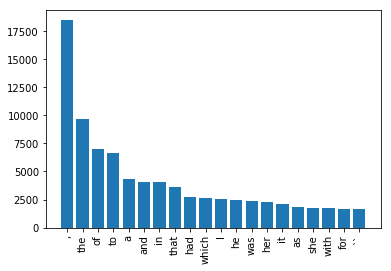

In [246]:
plt.bar(pd.DataFrame(fdist.most_common()[0:20])[0], pd.DataFrame(fdist.most_common()[0:20])[1])
plt.xticks(rotation=90)
plt.show()

In [231]:
# remove the stopwords from above list

In [247]:
stop_words = set(stopwords.words('english'))

In [250]:
result = [i for i in text_list_2 if not i in stop_words]

In [251]:
fdist = FreqDist(result) # checking most frequent words in whole document

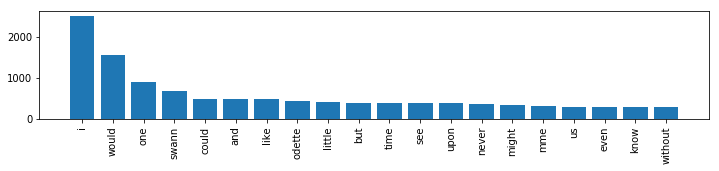

In [264]:
plt.figure(figsize= (12,2))
plt.bar(pd.DataFrame(fdist.most_common()[0:20])[0], pd.DataFrame(fdist.most_common()[0:20])[1])
plt.xticks(rotation=90)
plt.show()

In [258]:
# let's remove the punctuations and convert everythong to lowercase

In [259]:
words = [word.lower() for word in result if word.isalpha()]

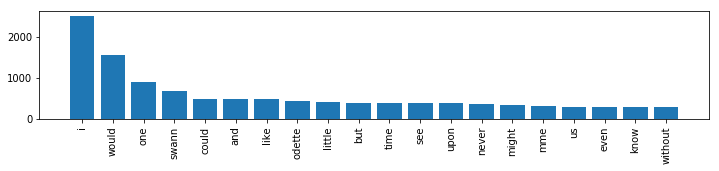

In [265]:
fdist = FreqDist(words) # checking most frequent words in whole document
plt.figure(figsize= (12,2))
plt.bar(pd.DataFrame(fdist.most_common()[0:20])[0], pd.DataFrame(fdist.most_common()[0:20])[1])
plt.xticks(rotation=90)
plt.show()

In [278]:
words[0:20]

['for',
 'long',
 'time',
 'i',
 'used',
 'go',
 'bed',
 'early',
 'sometimes',
 'i',
 'put',
 'candle',
 'eyes',
 'would',
 'close',
 'quickly',
 'i',
 'even',
 'time',
 'say']

In [ ]:
# let's look at stemming to reduce words to their word stem

In [266]:
from nltk.stem import PorterStemmer

In [267]:
stemmer = PorterStemmer()

In [279]:
for word in words[0:10]:
    print(stemmer.stem(word))

for
long
time
i
use
go
bed
earli
sometim
i


In [ ]:
# lemmatizer reduces inflectional forms to a common base form

In [273]:
from nltk.stem import WordNetLemmatizer

In [274]:
lemmatizer = WordNetLemmatizer()

In [276]:
for word in words[0:10]:
    print(lemmatizer.lemmatize(word))

for
long
time
i
used
go
bed
early
sometimes
i


In [280]:
# pos (part of speech) tagging 

In [287]:
result = nltk.pos_tag(words)

In [289]:
result[0:10]

[('for', 'IN'),
 ('long', 'JJ'),
 ('time', 'NN'),
 ('i', 'NN'),
 ('used', 'VBN'),
 ('go', 'VB'),
 ('bed', 'JJ'),
 ('early', 'JJ'),
 ('sometimes', 'RB'),
 ('i', 'JJ')]

In [290]:
pd.DataFrame(result)

,0,1
0,for,IN
1,long,JJ
2,time,NN
3,i,NN
4,used,VBN
5,go,VB
6,bed,JJ
7,early,JJ
8,sometimes,RB
9,i,JJ
